In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

set1 = pd.read_csv('S4_set1.csv', header=None)
set2 = pd.read_csv('S4_set2.csv', header=None)
labels = pd.read_csv('labels.csv', header=None).transpose()
labels.astype('category');

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset1 = scaler.fit_transform(set1)
dataset2 = scaler.fit_transform(set2)
dataset1 = pd.DataFrame(dataset1)
dataset2 = pd.DataFrame(dataset2)

In [3]:
from sklearn.feature_selection import SelectKBest, chi2
def Select(dataset, labels, k_features):
    selection = SelectKBest(score_func=chi2, k=k_features).fit(dataset, labels)
    scores = pd.DataFrame(selection.scores_)
    scores.columns = ['Score']
    features = scores.nlargest(k_features, 'Score').index.values
    new_dataset = dataset[features]
    return new_dataset, features, scores

In [4]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
def classifier(train, test, train_label, test_label):
    SVM = svm.SVC(kernel="rbf").fit(train, train_label)
    prediction = SVM.predict(test)

    TN, FP, FN, TP = confusion_matrix(test_label, prediction).ravel()
    Accuracy = (TN + TP) / (TN + FP + FN + TP)
    Error = 1 - Accuracy
    return Accuracy, Error

In [5]:
# Scenerio 1 

In [6]:
[dataset1_S1, features1_S1, scores1_S1] = Select(dataset1, labels, 10)
[dataset2_S1, features2_S1, scores2_S1] = Select(dataset2, labels, 10)

In [7]:
[S1_Acc1, S1_Err1] = classifier(dataset1_S1, dataset1_S1, labels.values.ravel(), labels.values.ravel())
print("Error dataset 1= ", S1_Err1)
[S1_Acc2, S1_Err2] = classifier(dataset2_S1, dataset2_S1, labels.values.ravel(), labels.values.ravel())
print("Error dataset 2= ", S1_Err2)

Error dataset 1=  0.0
Error dataset 2=  0.0


In [8]:
# Scenerio 2

In [20]:
from sklearn.model_selection import train_test_split
S2_Err1_sum = 0
S2_Err2_sum = 0
ACC1_S2 = np.array([])
ACC2_S2 = np.array([])
for i in range(50):
    dataset1_S2, features1_S2, scores1_S2 = Select(dataset1, labels, 10)
    dataset2_S2, features2_S2, scores2_S2 = Select(dataset2, labels, 10)
    x1_train_S2, x1_test_S2, y1_train_S2, y1_test_S2=train_test_split(dataset1_S2,labels,test_size=0.5)
    x2_train_S2, x2_test_S2, y2_train_S2, y2_test_S2=train_test_split(dataset2_S2,labels,test_size=0.5)
    S2_Acc1, S2_Err1 = classifier(x1_train_S2, x1_test_S2, y1_train_S2.values.ravel(), y1_test_S2.values.ravel())
    S2_Acc2, S2_Err2 = classifier(x2_train_S2, x2_test_S2, y2_train_S2.values.ravel(), y2_test_S2.values.ravel())
    S2_Err1_sum = S2_Err1 + S2_Err1_sum
    S2_Err2_sum = S2_Err2 + S2_Err2_sum
    ACC1_S2 = np.append(ACC1_S2, S2_Acc1)
    ACC2_S2 = np.append(ACC2_S2, S2_Acc2)

print("Error dataset 1 = ", (S2_Err1_sum/50))
print("Error dataset 2 = ", (S2_Err2_sum/50))

Error dataset 1 =  0.0
Error dataset 2 =  0.022000000000000002


In [10]:
# Scenerio 3

In [23]:
S3_Err1_sum = 0
S3_Err2_sum = 0
ACC1_S3 = np.array([])
ACC2_S3 = np.array([])
selected1=np.array([])
selected2=np.array([])
for i in range(50):
    x1_train_S3, x1_test_S3, y1_train_S3, y1_test_S3 = train_test_split(dataset1,labels,test_size=0.5)
    x2_train_S3, x2_test_S3, y2_train_S3, y2_test_S3 = train_test_split(dataset2,labels,test_size=0.5)
    [x1_train_S3_2, features1_S3_2, scores1_S3_2] = Select(x1_train_S3, y1_train_S3, 10)
    [x2_train_S3_2, features2_S3_2, scores2_S3_2] = Select(x2_train_S3, y2_train_S3, 10)
    selected1=np.append(selected1,features1_S3_2) # selected features for first dataset
    selected2=np.append(selected2,features2_S3_2) # selected features for second dataset
    x1_test_S3 = x1_test_S3[features1_S3_2]
    x2_test_S3 = x2_test_S3[features2_S3_2]
    [S3_Acc1, S3_Err1] = classifier(x1_train_S3_2, x1_test_S3, y1_train_S3.values.ravel(), y1_test_S3.values.ravel())
    [S3_Acc2, S3_Err2] = classifier(x2_train_S3_2, x2_test_S3, y2_train_S3.values.ravel(), y2_test_S3.values.ravel())
    S3_Err1_sum = S3_Err1 + S3_Err1_sum
    S3_Err2_sum = S3_Err2 + S3_Err2_sum
    ACC1_S3 = np.append(ACC1_S3, S3_Acc1)
    ACC2_S3 = np.append(ACC2_S3, S3_Acc2)

print("Error dataset 1 = ", S3_Err1_sum/50)
print("Error dataset 2 = ", S3_Err2_sum/50)

Error dataset 1 =  0.054000000000000006
Error dataset 2 =  0.5660000000000001


In [30]:
indexes, counts= np.unique(selected1, return_counts=True)
print(indexes)
print(counts)
print('Indices of discriminative features: ')
indexes[counts==50]

[   0.   15.   37.   86.  166.  170.  174.  184.  198.  238.  259.  284.
  291.  351.  376.  385.  476.  499.  536.  543.  547.  560.  598.  616.
  636.  708.  776.  788.  827.  936.  969. 1010. 1027. 1146. 1147. 1184.
 1245. 1252. 1257. 1324. 1362. 1541. 1561. 1571. 1606. 1617. 1685. 1695.
 1722. 1836. 1840. 1850. 1860. 1867. 1889. 1910. 1938. 1940. 1961. 1965.
 1977. 2034. 2074. 2080. 2126. 2178. 2196. 2218. 2247. 2259. 2295. 2302.
 2326. 2370. 2371. 2372. 2435. 2458. 2542. 2548. 2553. 2575. 2577. 2614.
 2616. 2630. 2632. 2647. 2665. 2668. 2722. 2730. 2742. 2753. 2759. 2760.
 2777. 2781. 2789. 2869. 2891. 2930. 2939. 2976. 3007. 3017. 3026. 3067.
 3075. 3082. 3110. 3123. 3132. 3164. 3184. 3208. 3243. 3247. 3393. 3406.
 3427. 3433. 3439. 3453. 3483. 3550. 3565. 3581. 3674. 3699. 3703. 3706.
 3714. 3719. 3722. 3743. 3770. 3821. 3858. 3878. 3902. 3938. 3954. 3956.
 3997. 4013. 4017. 4041. 4044. 4098. 4139. 4332. 4392. 4419. 4495. 4499.
 4539. 4550. 4553. 4571. 4603. 4667. 4688. 4705. 47

array([], dtype=float64)

Text(0.5, 1.0, 'Dataset 2')

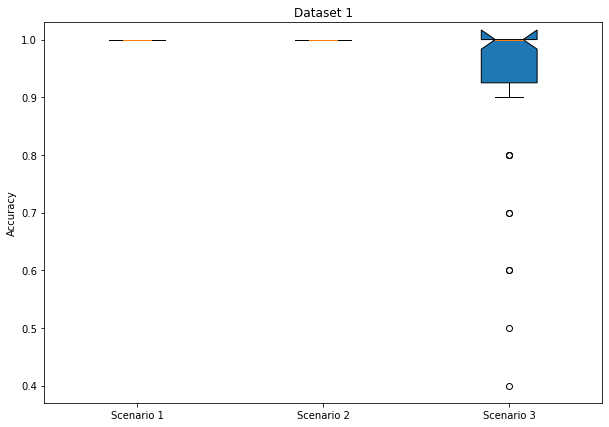

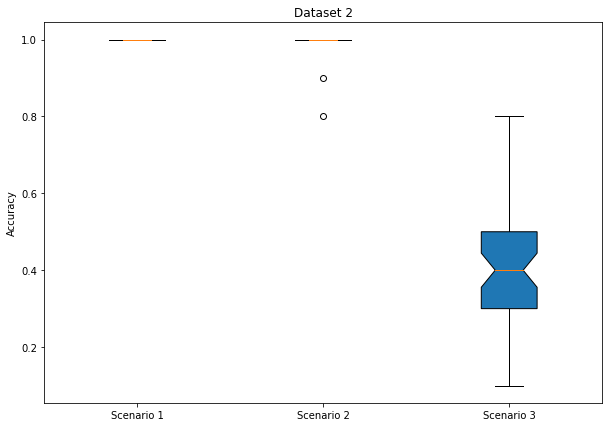

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
data1= [S1_Acc1, ACC1_S2, ACC1_S3]
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111)
bp=ax.boxplot(data1, patch_artist=True, notch='True', vert=1)
ax.set_xticklabels(['Scenario 1','Scenario 2','Scenario 3'])
ax.set_ylabel('Accuracy'); ax.set_title('Dataset 1')

data2= [S2_Acc1, ACC2_S2, ACC2_S3]
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111)
bp=ax.boxplot(data2, patch_artist=True, notch='True', vert=1)
ax.set_xticklabels(['Scenario 1','Scenario 2','Scenario 3'])
ax.set_ylabel('Accuracy'); ax.set_title('Dataset 2')

In [13]:
# REAL DATASET FROM SECOND LABORATORY:
train_real=pd.read_csv("Xtrain.csv",header=None)
train_class=pd.read_csv("Ytrain.csv",header=None)
test_real=pd.read_csv("Xtest.csv",header=None)
test_class=pd.read_csv("Ytest.csv",header=None)

In [14]:
real = np.concatenate((train_real.T,test_real.T))
real_data=pd.DataFrame(real)
real_labels =  np.concatenate((train_class.T,test_class.T))
real_labels = pd.DataFrame(real_labels)

In [15]:
scaling_real = MinMaxScaler()
real_data = scaling_real.fit_transform(real_data)
real_data = pd.DataFrame(real_data)

In [16]:
# SCENARIO 1
[new_real, selected_real, real_score] = Select(real_data, real_labels, 15)

[ACC_real, Error_real] = classifier(new_real,new_real,real_labels.values.ravel(),real_labels.values.ravel())

print('Classification error for real dataset (scenario 1)'); print(Error_real)

Classification error for real dataset (scenario 1)
0.040000000000000036


In [17]:
# SCENARIO 2
[new_real2, selected_real2, real_score2] = Select(real_data, real_labels, 15)

train_real, test_real, train_lab, test_lab = train_test_split(new_real2,real_labels, test_size=0.5)
    
[ACC_real2, Error_real2] = classifier(train_real,test_real, train_lab.values.ravel(), test_lab.values.ravel())

print('Classification error for real dataset (scenario 2)'); print(Error_real2)

Classification error for real dataset (scenario 2)
0.07936507936507942


In [18]:
# SCENARIO 3 
train_real2, test_real2, train_lab2, test_lab2 = train_test_split(real_data,real_labels, test_size=0.5)

[train_real3, selected_real3, real_score3] = Select(train_real2, train_lab2, 15)
   
test_real2 = test_real2[selected_real3]

[ACC_real3, Error_real3] = classifier(train_real3,test_real2, train_lab2.values.ravel(),test_lab2.values.ravel())

print('Classification error for real dataset (scenario 3)'); print(Error_real3)

Classification error for real dataset (scenario 3)
0.015873015873015928
